# Suicide Rate Data
## One Data Set On Suicide Rates (suicide_data)
## Another Data Set On Country Information (extra_data)

In [68]:
#import dependencies
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.font_manager as font_manager

In [51]:
#read in CSV files saved locally
og_csv="/Users/kassyedwards/Desktop/Project1/master.csv"
master_data=pd.read_csv(og_csv)
new_csv="/Users/kassyedwards/Desktop/Project1/newcountries.csv"
country_data=pd.read_csv(new_csv)

In [52]:
#create functions for use later in graph analysis
def plt_bar(w,x,y,z):
    plt.bar(w,x)
    plt.axhline(x.mean(), color='r')
    plt.ylim(bottom=y)
    plt.title(f"Total {z} Suicides Over Time")

In [53]:
#create functions for later use in graph analysis
def group_df(x,y):
    x = x[['country','year',y,'suicides_no','population']]
    x = x.groupby(['country','year',y]).sum()
    suicide_percent_df = pd.DataFrame(x['suicides_no']/x['population'])*100
    x = x.join(suicide_percent_df,how='left')
    x = x.rename(columns = {0:'%_total_pop'})
    x = x.reset_index()
    return x

# Data Cleaning

In [35]:
#clena data for master data
master_data.dropna(how='any')
master_data.count()
master_data.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

In [42]:
master_data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [36]:
#clean data for country information 
country_data.dropna(how='any')
country_data.count()
country_data.dtypes

country                                object
Region                                 object
Population                              int64
Area                                    int64
Pop. Density (per sq. mi.)             object
Coastline (coast/area ratio)           object
Net migration                          object
Infant mortality (per 1000 births)     object
GDP ($ per capita)                    float64
Literacy (%)                           object
Phones (per 1000)                      object
Arable (%)                             object
Crops (%)                              object
Other (%)                              object
Climate                                object
Birthrate                              object
Deathrate                              object
Agriculture                            object
Industry                               object
Service                                object
dtype: object

In [37]:
country_data.head()

,country,Region,Population,Area,Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Monaco,WESTERN EUROPE,32543,2,"16271,5","205,00","7,75","5,43",27000.0,"99,0","1035,6",0,0,100,NaN,"9,19","12,91","0,17",NaN,NaN
1,Gibraltar,WESTERN EUROPE,27928,7,"3989,7","171,43",0,"5,13",17500.0,NaN,"877,7",0,0,100,NaN,"10,74","9,31",NaN,NaN,NaN
2,Nauru,OCEANIA,13287,21,"632,7","142,86",0,"9,95",5000.0,NaN,"143,0",0,0,100,2,"24,76","6,7",NaN,NaN,NaN
3,Tuvalu,OCEANIA,11810,26,"454,2","92,31",0,"20,03",1100.0,NaN,"59,3",0,0,100,2,"22,18","7,11","0,166","0,272","0,562"
4,Macau,ASIA (EX. NEAR EAST),453125,28,"16183,0","146,43","4,86","4,39",19400.0,"94,5","384,9",0,0,100,2,"8,48","4,47","0,001","0,072","0,927"


In [38]:
#merge the two data sets into one 
suicide_data=pd.merge(country_data, master_data, on= "country")
suicide_data

,country,Region,Population,Area,Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Macau,ASIA (EX. NEAR EAST),453125,28,"16183,0","146,43","4,86","4,39",19400.0,"94,5",...,male,75+ years,2,3622,55.22,Macau1994,NaN,"6,265,844,252",18081,G.I. Generation
1,Macau,ASIA (EX. NEAR EAST),453125,28,"16183,0","146,43","4,86","4,39",19400.0,"94,5",...,female,75+ years,3,6106,49.13,Macau1994,NaN,"6,265,844,252",18081,G.I. Generation
2,Macau,ASIA (EX. NEAR EAST),453125,28,"16183,0","146,43","4,86","4,39",19400.0,"94,5",...,female,55-74 years,3,20340,14.75,Macau1994,NaN,"6,265,844,252",18081,Silent
3,Macau,ASIA (EX. NEAR EAST),453125,28,"16183,0","146,43","4,86","4,39",19400.0,"94,5",...,male,55-74 years,2,17269,11.58,Macau1994,NaN,"6,265,844,252",18081,Silent
4,Macau,ASIA (EX. NEAR EAST),453125,28,"16183,0","146,43","4,86","4,39",19400.0,"94,5",...,male,35-54 years,6,55677,10.78,Macau1994,NaN,"6,265,844,252",18081,Boomers
5,Macau,ASIA (EX. NEAR EAST),453125,28,"16183,0","146,43","4,86","4,39",19400.0,"94,5",...,male,25-34 years,3,34319,8.74,Macau1994,NaN,"6,265,844,252",18081,Boomers
6,Macau,ASIA (EX. NEAR EAST),453125,28,"16183,0","146,43","4,86","4,39",19400.0,"94,5",...,male,15-24 years,2,23147,8.64,Macau1994,NaN,"6,265,844,252",18081,Generation X
7,Macau,ASIA (EX. NEAR EAST),453125,28,"16183,0","146,43","4,86","4,39",19400.0,"94,5",...,female,35-54 years,4,48296,8.28,Macau1994,NaN,"6,265,844,252",18081,Boomers
8,Macau,ASIA (EX. NEAR EAST),453125,28,"16183,0","146,43","4,86","4,39",19400.0,"94,5",...,female,25-34 years,2,43286,4.62,Macau1994,NaN,"6,265,844,252",18081,Boomers
9,Macau,ASIA (EX. NEAR EAST),453125,28,"16183,0","146,43","4,86","4,39",19400.0,"94,5",...,female,15-24 years,0,28458,0.00,Macau1994,NaN,"6,265,844,252",18081,Generation X


In [39]:
suicide_data.columns

Index(['country', 'Region', 'Population', 'Area', 'Pop. Density (per sq. mi.)',
       'Coastline (coast/area ratio)', 'Net migration',
       'Infant mortality (per 1000 births)', 'GDP ($ per capita)',
       'Literacy (%)', 'Phones (per 1000)', 'Arable (%)', 'Crops (%)',
       'Other (%)', 'Climate', 'Birthrate', 'Deathrate', 'Agriculture',
       'Industry', 'Service', 'year', 'sex', 'age', 'suicides_no',
       'population', 'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

# Macro Analysis/ Data Exploration

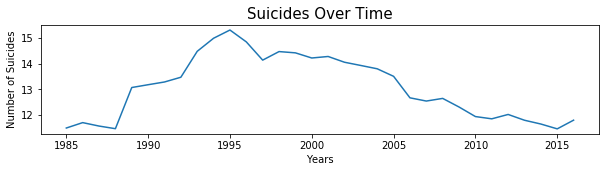

In [110]:
#graph of global suicide rate over time 
master_data.groupby("year").sum()[["suicides_no", "population"]].apply(lambda x: x.suicides_no/x.population * 100000, axis=1).plot()
plt.title(f'Suicides Over Time', fontsize=15)
plt.xlabel("Years", fontsize=10)
plt.ylabel("Number of Suicides", fontsize=10)
plt.savefig('overtime.png')


## Gender Analysis

In [56]:
popdensity_df = suicide_data[['country','year','sex','age','suicides_no','population','generation','Area']]

In [57]:
filter_agegender_df = popdensity_df[['country','year','sex','age','suicides_no','population','generation']]

In [81]:
title_font = {'fontname':'Arial', 'size':'29', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} 
axis_font = {'fontname':'Arial', 'size':'20'}

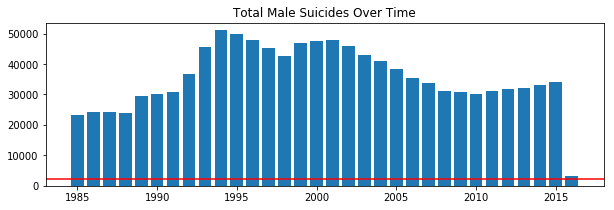

In [74]:
# Male only DataFrame
maleonlydf = filter_agegender_df[filter_agegender_df['sex']=='male']
maleonlydf = group_df(maleonlydf,'sex')
# Male Bar Graph
plt_bar(maleonlydf['year'],maleonlydf['suicides_no'], 0,'Male')
plt.show()


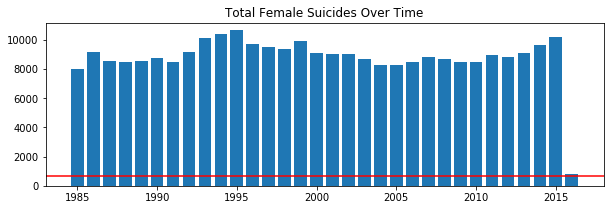

In [75]:
# Female only DataFrame
femaleonlydf = filter_agegender_df[filter_agegender_df['sex']=='female']
femaleonlydf = group_df(femaleonlydf,'sex')
# Female Bar Graph
plt_bar(femaleonlydf['year'],femaleonlydf['suicides_no'], 0,'Female')
plt.show()

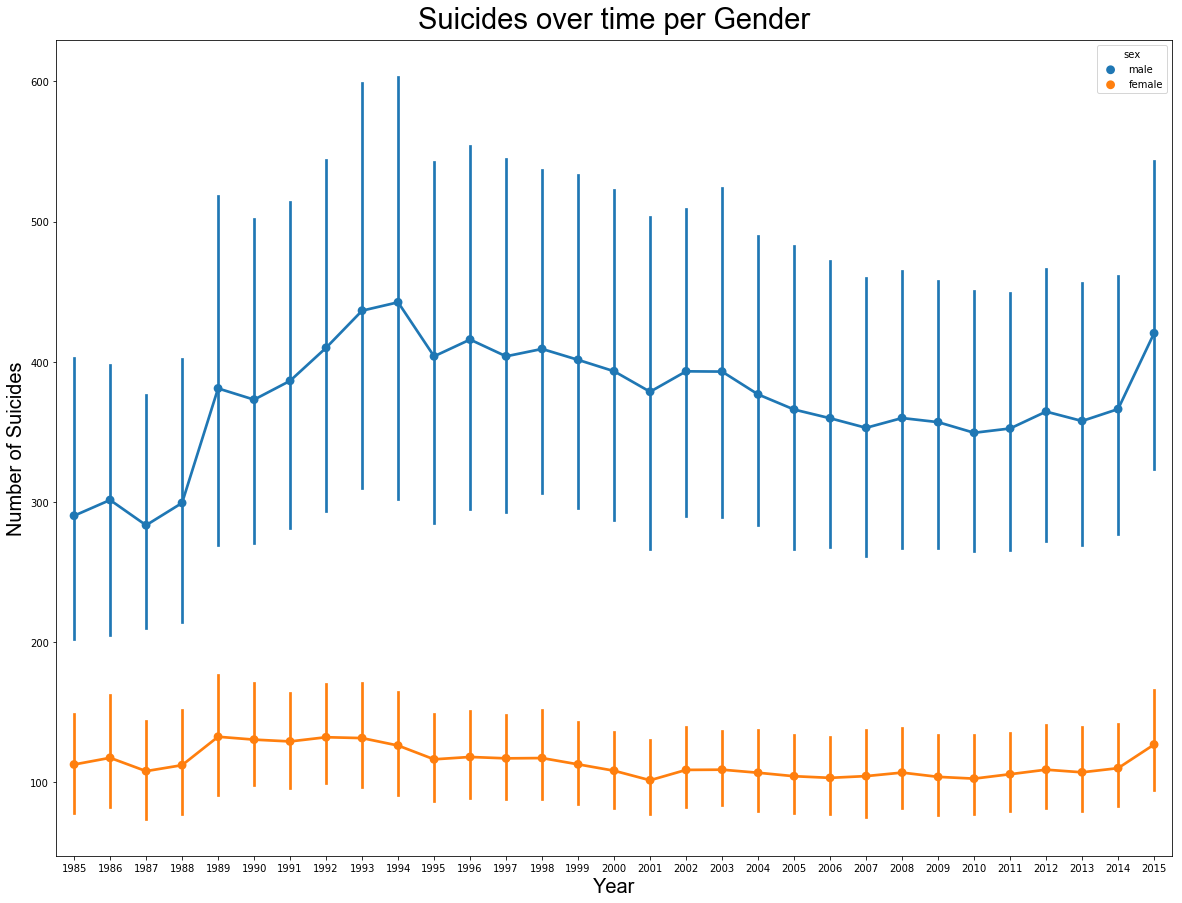

In [86]:
#suicides over time by gender
suicide_df = suicide_data[suicide_data.year != 2016]
plt.figure(figsize=(20, 15))
sns.pointplot(data=suicide_df, x="year", y="suicides_no", hue="sex")
plt.title(f'Suicides over time per Gender', **title_font)
plt.xlabel("Year", **axis_font)
plt.ylabel("Number of Suicides", **axis_font)
plt.savefig('OverTimeByGender.png')
plt.show()

## Age Group Comparisons

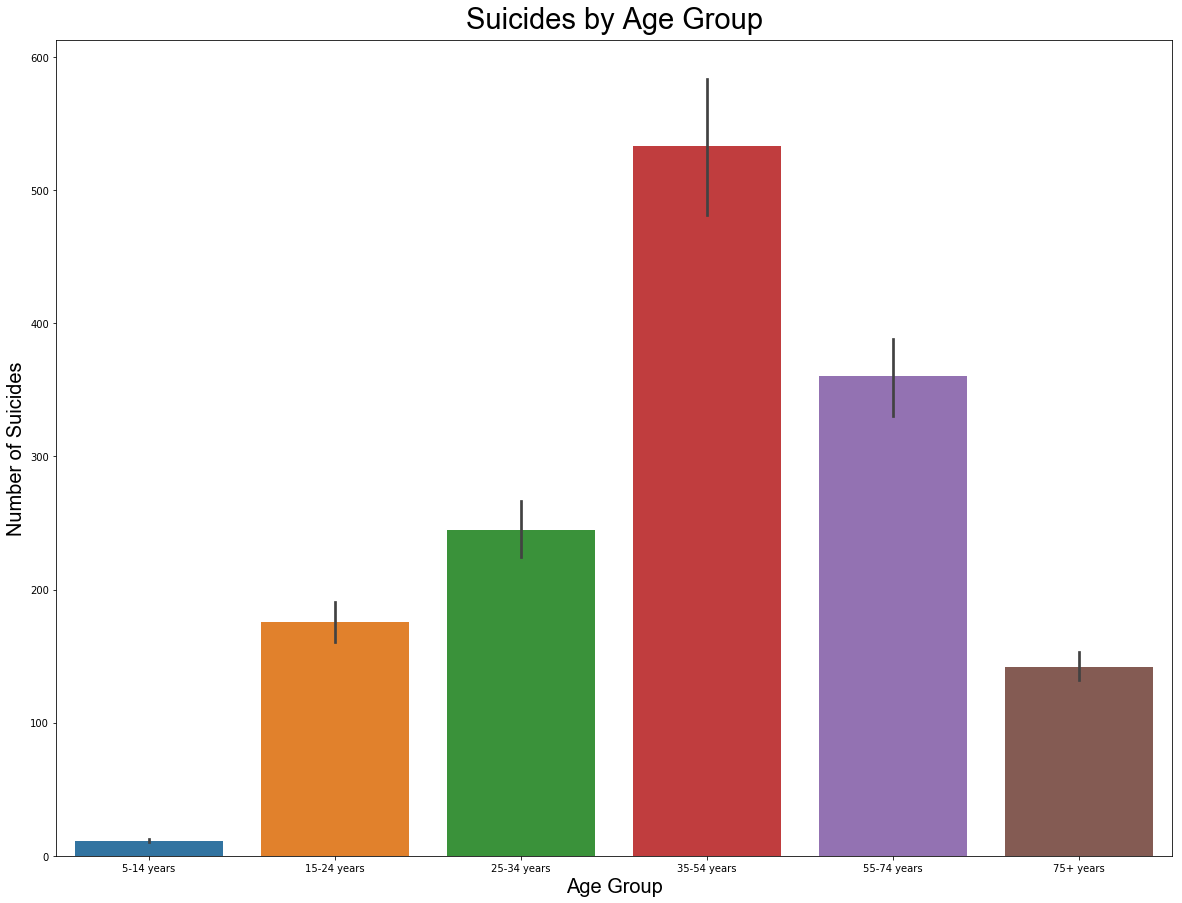

In [111]:
#suicides by age group
plt.figure(figsize=(20, 15))
sns.barplot(data=suicide_df, x="age", y="suicides_no", order=['5-14 years', "15-24 years", '25-34 years','35-54 years','55-74 years','75+ years'])
plt.title(f'Suicides by Age Group', **title_font)
plt.xlabel("Age Group", **axis_font)
plt.ylabel("Number of Suicides", **axis_font)
plt.savefig('ByAgeGroup.png')
plt.show()

## Generation Comparisons

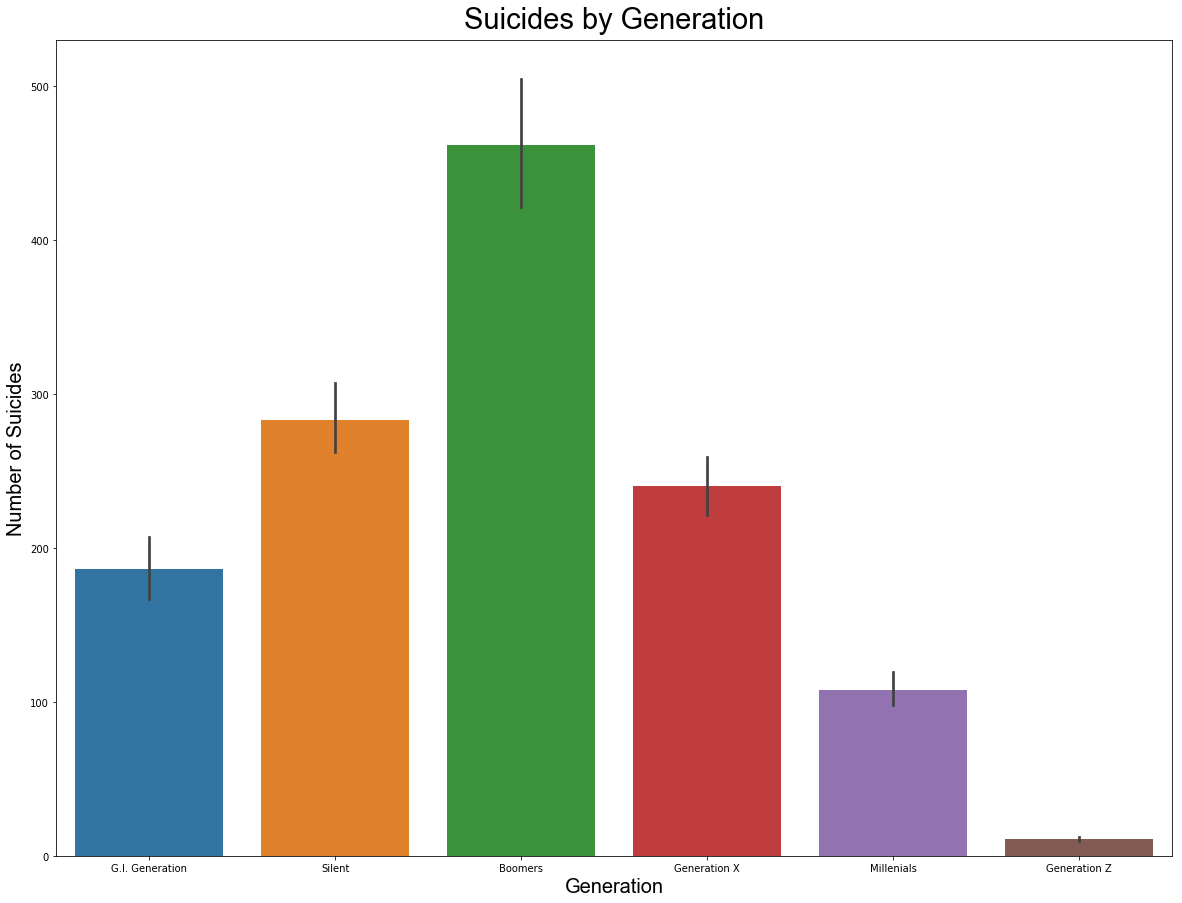

In [112]:
#suicides by Generation
plt.figure(figsize=(20, 15))
sns.barplot(data=suicide_df, x="generation", y="suicides_no", order = ['G.I. Generation','Silent','Boomers','Generation X','Millenials','Generation Z'])
plt.title(f'Suicides by Generation', **title_font)
plt.xlabel("Generation", **axis_font)
plt.ylabel("Number of Suicides", **axis_font)
plt.savefig('ByGeneration.png')
plt.show()

# Suicides By Region

In [40]:
suicide_numb_region= suicide_data.groupby("Region").sum()["suicides_no"]
population_region= suicide_data.groupby("Region").mean()['Population']
suicide_rate_region= (suicide_numb_region/ population_region)*100
gdppercapita_region= suicide_data.groupby("Region").mean()["gdp_per_capita ($)"]

suicide_grouped_region= pd.DataFrame({
    "Suicide Rate": suicide_rate_region,
    "GDP per Capita": gdppercapita_region,
    
})

suicide_grouped_region

,Suicide Rate,GDP per Capita
Region,,
ASIA (EX. NEAR EAST),2.239633,18728.699580
BALTICS,1.984743,9864.851175
C.W. OF IND. STATES,6.091900,2717.882839
EASTERN EUROPE,3.725274,8257.313536
LATIN AMER. & CARIB,3.209658,7167.313869
NEAR EAST,0.368843,29403.211957
NORTHERN AMERICA,0.670749,35218.250000
OCEANIA,0.932232,20766.395062
SUB-SAHARAN AFRICA,0.086939,6818.997647


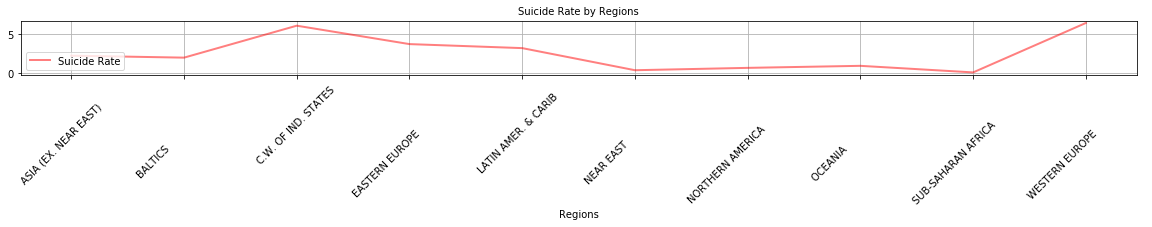

In [120]:
plt.plot(suicide_grouped_region["Suicide Rate"], label= "Suicide Rate", c="red", alpha=0.5, linewidth= 2)
plt.title("Suicide Rate by Regions", fontsize=10)
plt.xticks( rotation= 45)
plt.xlabel("Regions", fontsize=10)
plt.grid(True)
plt.legend(loc='lower left')
plt.rcParams["figure.figsize"] = (10, 3)

plt.show()

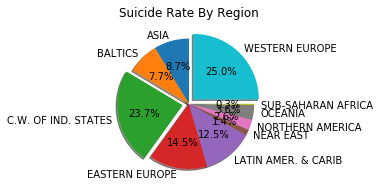

<Figure size 1440x72 with 0 Axes>

In [121]:
explode = (0, 0, 0.1, 0, 0, 0, 0, 0, 0, 0.1)
lables= "ASIA", "BALTICS", "C.W. OF IND. STATES", "EASTERN EUROPE", "LATIN AMER. & CARIB", "NEAR EAST", "NORTHERN AMERICA","OCEANIA", "SUB-SAHARAN AFRICA", "WESTERN EUROPE" 
plt.pie(suicide_rate_region, explode=explode, labels= lables, shadow=True, startangle=90, autopct='%1.1f%%')
plt.rcParams["figure.figsize"] = (20,1)
plt.xticks( rotation= 90)
plt.title(f'Suicide Rate By Region')
plt.show()
plt.savefig("Suicide_Region_Pie")

# Suicide And GDP Per Capita

In [30]:
test= suicide_grouped_region.drop(suicide_grouped_region.index[3])
test
test1= suicide_grouped_region.drop(suicide_grouped_region.index[9])
test1

,Suicide Rate,GDP per Capita
Region,,
ASIA (EX. NEAR EAST),2.239633,18728.699580
BALTICS,1.984743,9864.851175
C.W. OF IND. STATES,6.091900,2717.882839
EASTERN EUROPE,3.725274,8257.313536
LATIN AMER. & CARIB,3.209658,7167.313869
NEAR EAST,0.368843,29403.211957
NORTHERN AMERICA,0.670749,35218.250000
OCEANIA,0.932232,20766.395062
SUB-SAHARAN AFRICA,0.086939,6818.997647


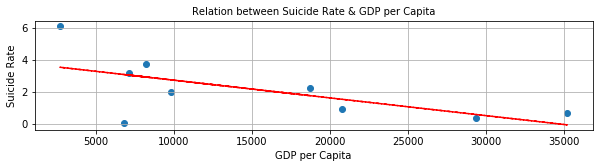

In [104]:
plt.scatter(test1['GDP per Capita'], test1['Suicide Rate'])
z= np.polyfit(test1['GDP per Capita'], test1['Suicide Rate'], 1)
p= np.poly1d(z)
plt.plot(test1['GDP per Capita'], p(test1['GDP per Capita']), "r--")
plt.title("Relation between Suicide Rate & GDP per Capita", fontsize=10)
plt.xlabel("GDP per Capita", fontsize=10)
plt.ylabel("Suicide Rate", fontsize=10)
plt.grid(True)
plt.show()

# The Relationship Between HDI and Suicides

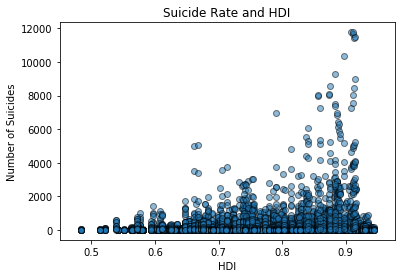

In [44]:
hdi_scatter = plt.scatter(master_data['HDI for year'],master_data['suicides_no'], marker="o", alpha=0.5, edgecolors="black")
plt.title("Suicide Rate and HDI")
plt.xlabel("HDI")
plt.ylabel("Number of Suicides")
plt.savefig("hdi_scatter.png")